In [1]:
import pandas as pd
import os
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

In [2]:
possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/Thesis_Sofia_Lennert/new_data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert/new_data'
]

# Define file names
file = 'merged_data.csv'

# Find full paths to the CSV files
path = next((f'{path}/{file}' for path in possible_paths if os.path.exists(f'{path}/{file}')), None)

In [3]:
# Resulting DataFrame will have aggregated data from all four datasets based on the specific_column
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv(path)
data

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-2y,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-2y,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after
0,MSOAC/0649,NaN,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,Y,SPMS,0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.35,10.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MSOAC/2224,38.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,0,1,0,0,NaN,NaN,27.80,26.55,NaN,NaN,NaN,NaN,55.0,56.0,NaN,38.0,42.0,8.90,8.85,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,30.0,30.0,1.25,1.25,NaN,0.380952,0.388889,3.00,3.0,NaN,0.000000,NaN,0.000000,0.2,NaN,0.2,0.000000,NaN,0.000000,0.5,NaN,0.500000,0.0,NaN,0.0,0.000000,NaN,0.0,0.0,NaN,0.0,0.148148,NaN,0.148148,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.8,0.7,0.5,0.5
2,MSOAC/0576,50.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,0,1,NaN,NaN,17.75,18.65,17.90,51.0,56.5,56.5,59.0,59.0,59.5,NaN,NaN,4.55,4.70,5.15,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75,4.0,4.25,0.333333,0.250000,0.333333,0.0,0.0,0.1,0.250000,0.166667,0.333333,0.5,0.500000,0.500000,0.0,0.2,0.0,0.083333,0.083333,0.0,0.4,0.4,0.3,0.240741,0.277778,0.259259,0.166667,0.125000,0.166667,0.628571,0.671429,0.594937,0.531646,NaN,NaN,NaN,NaN
3,MSOAC/4961,44.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,1,1,NaN,NaN,19.75,19.45,20.60,38.5,52.0,54.0,55.5,59.0,58.0,NaN,NaN,4.00,4.90,5.60,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50,3.5,3.50,0.333333,0.250000,0.333333,0.0,0.1,0.0,0.166667,0.250000,0.250000,0.5,0.500000,0.416667,0.0,0.2,0.0,0.000000,0.000000,0.0,0.2,0.3,0.3,0.185185,0.277778,0.222222,0.083333,0.125000,0.125000,0.614286,0.614286,0.582278,0.645570,NaN,NaN,NaN,NaN
4,MSOAC/5990,52.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,1,1,0,1,NaN,NaN,21.45,21.35,22.75,22.0,23.5,22.0,35.0,41.5,44.0,NaN,NaN,11.40,16.80,30.20,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,6.0,6.50,0.166667,0.333333,0.166667,0.2,0.2,0.2,0.166667,0.166667,0.166667,0.5,0.666667,0.500000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.4,0.0,0.222222,0.333333,0.185185,0.083333,0.166667,0.083333,0.600000,0.742857,0.506329,0.531646,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,MSOAC/2501,46.0,F,WHITE,NaN,NaN,NaN,12.0,NaN,SPMS,0,0,0,0,NaN,NaN,29.40,25.65,NaN,14.0,12.0,NaN,17.5,16.0,NaN,NaN,NaN,9.30,8.10,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642857,0.614286,0.645570,0.588608,NaN,NaN,NaN,NaN
2461,MSOAC/8672,43.0,F,NaN,NaN,MODERATE,NaN,1.0,NaN,RRMS,

Set to 0 because ... (write the explanation)

In [5]:
data['NRELAP'] = data['NRELAP'].fillna(0)

In [6]:
missing_percentage_data = (data.isnull().sum() / len(data)) * 100
missing_data = pd.DataFrame({'Column Name': missing_percentage_data.index, 'Missing Percentage': missing_percentage_data.values})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
missing_data.head(60)

,Column Name,Missing Percentage
8,MHCONTRT,88.235294
37,DS_L,87.423935
38,DS_R,87.423935
36,DS,87.423935
21,PASAT_2s-after_2y,85.922921
6,CECONTRT,82.799189
83,SF12_P-after,79.918864
81,SF12_M-after,79.918864
26,SDMT-2y,79.878296
82,SF12_P-before,79.797160


In [7]:
#missing_data[missing_data['Column Name'] == 'RACE']

In [8]:
#data = data.dropna(subset='RACE', how='any')

Question from them during meeting: how many rows we have for which the targets are all there (supervised, other rows would be 'semi-supervised') -- note I don't yet use all the targets here because I feel it will be 0 (it's already 154 now using only the most occuring functional tests)

In [9]:
# Specify the list of variables
#variables = ['NRELAP', 'CESEV', 'SMSTDY', 'EDSS-2y', 'EDSS-after_2y', 'NHPT-2y', 'NHPT-after_2y', 'T25FW-2y', 'T25FW-after_2y']
variables = ['EDSS-2y', 'T25FW-2y']
# Check for rows where there are no missing values in any of the specified variables
rows_with_no_missing_values = data.dropna(subset=variables, how='any')

# Display the number of rows with no missing values
print("Number of complete cases (fully annotated dataset):", len(rows_with_no_missing_values))

Number of complete cases (fully annotated dataset): 1598


try to use the package Robbe set (these plots are not informative so we can remove later - only do for outputs)

<Axes: >

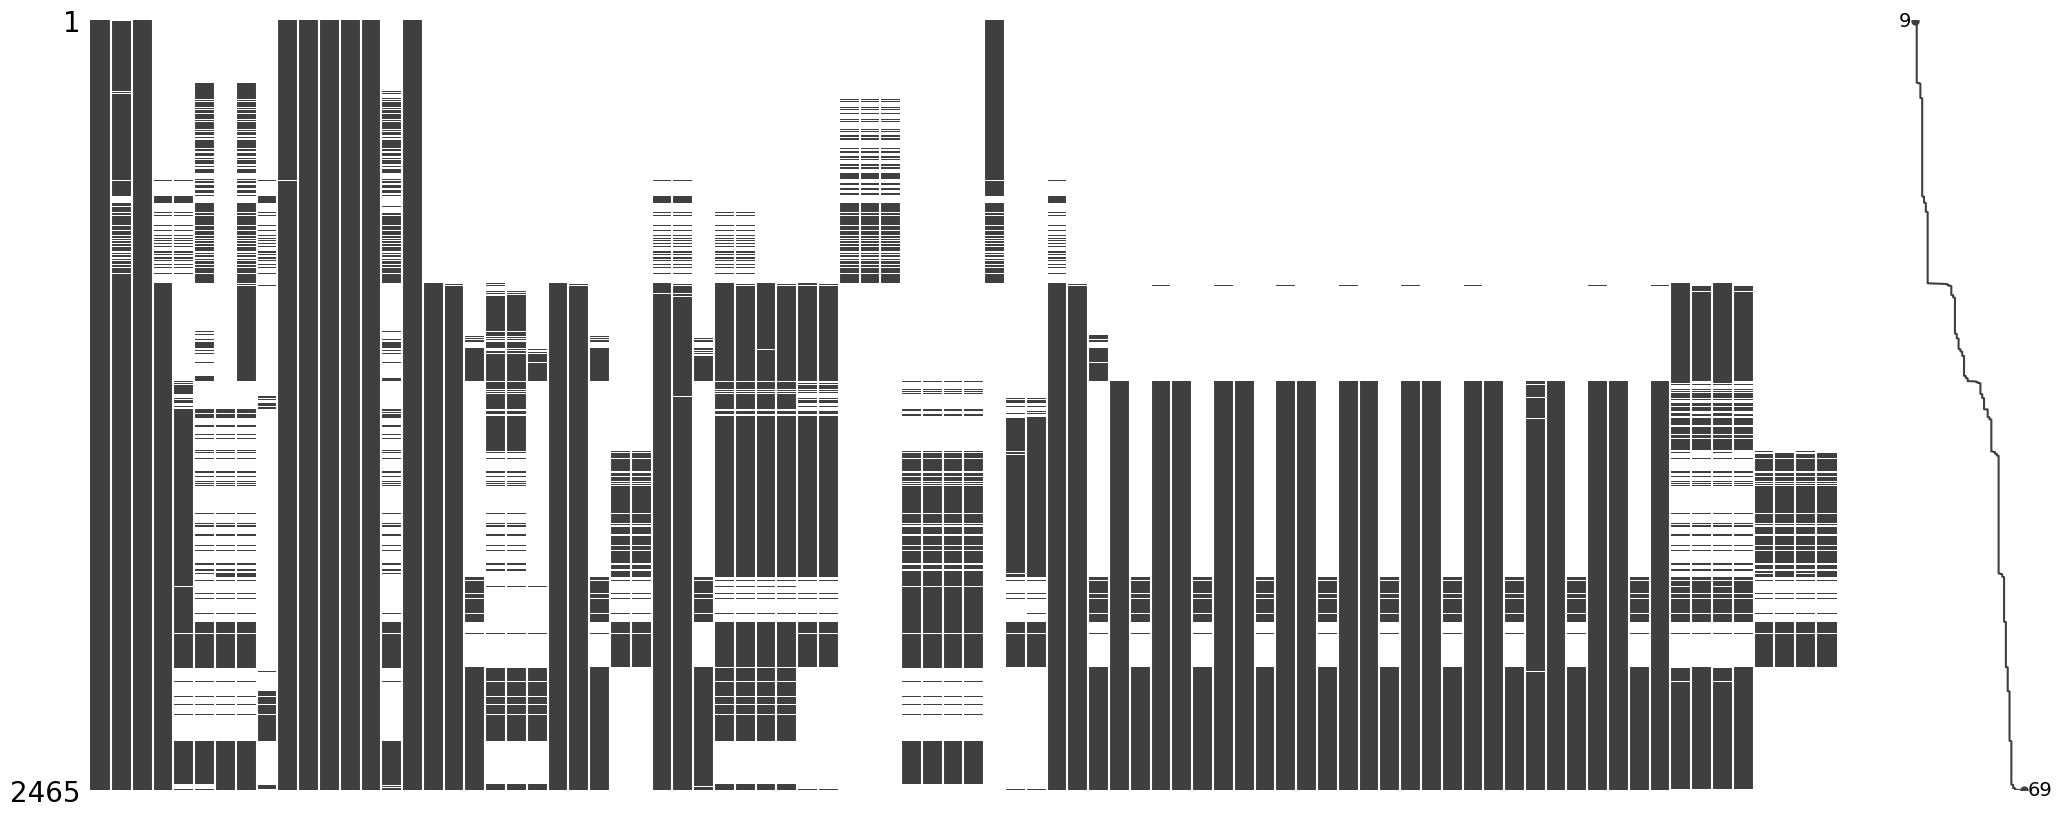

In [10]:
msno.matrix(data,sort="ascending")

In [11]:
#msno.bar(data)

In [12]:
#msno.heatmap(data)

<Axes: >

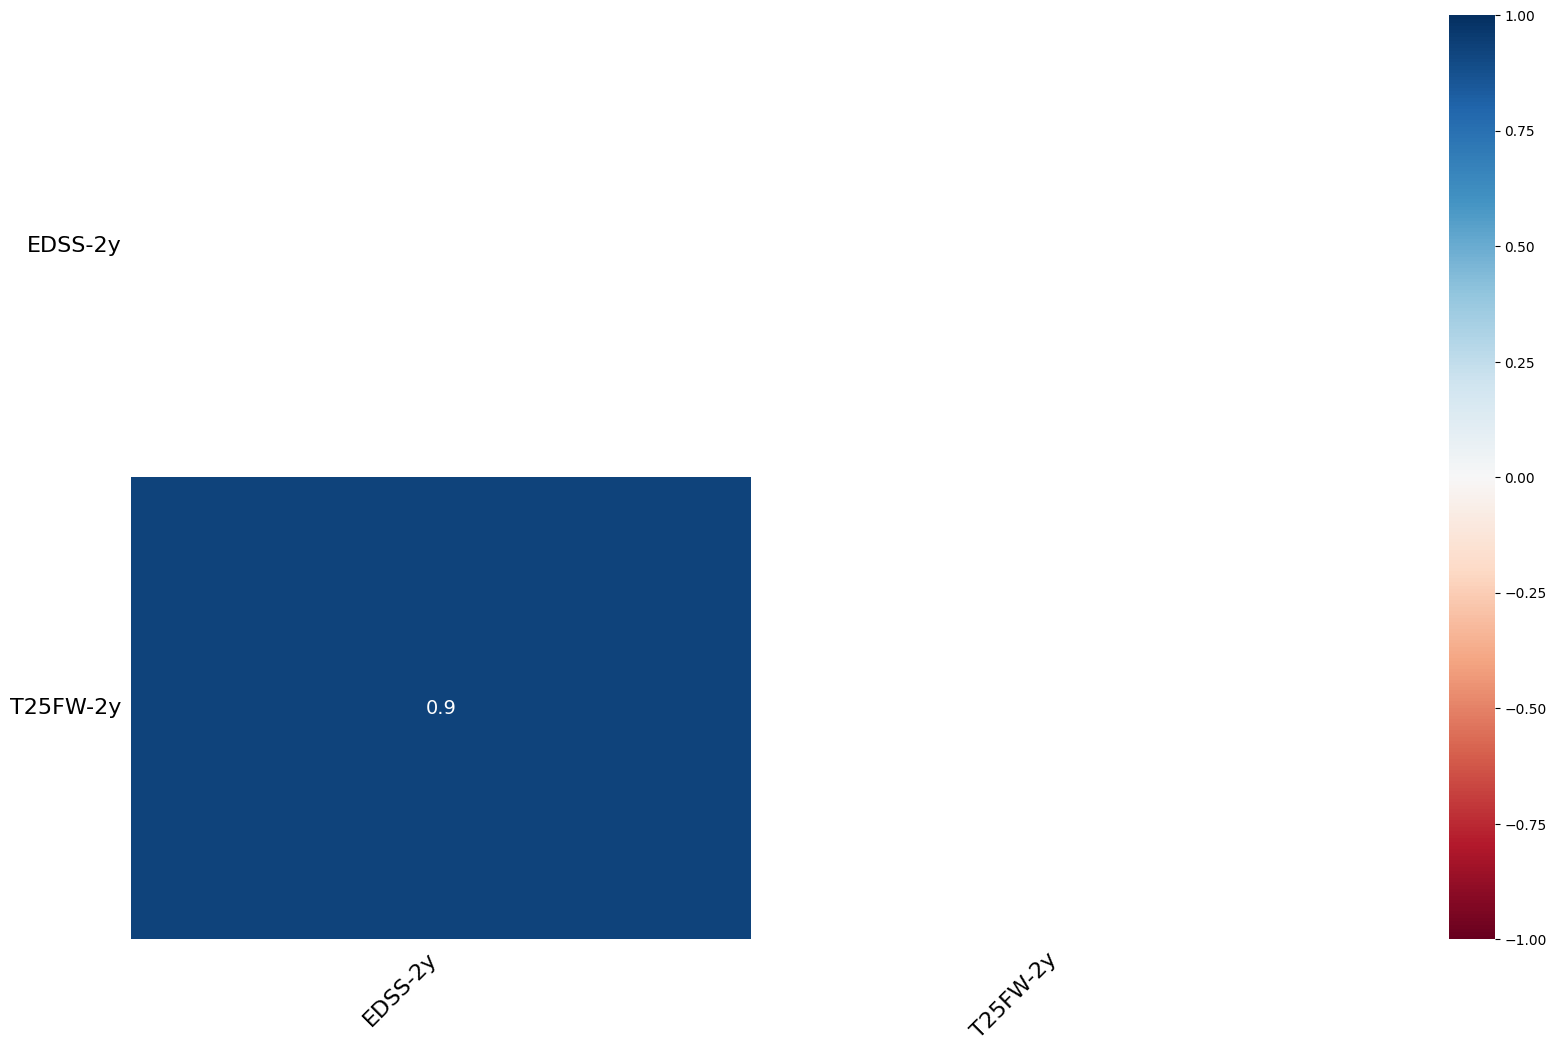

In [13]:
targets = data[variables]
msno.heatmap(targets)

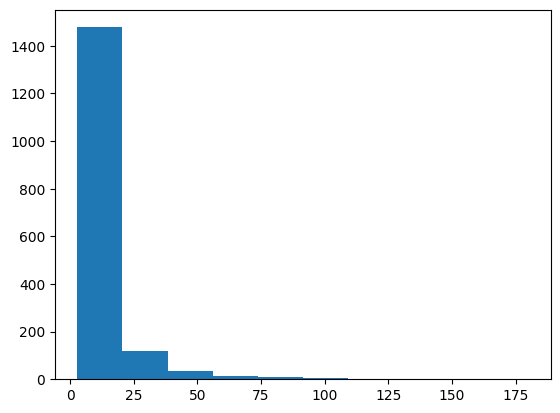

In [14]:
plt.hist(data["T25FW-2y"])
plt.show()

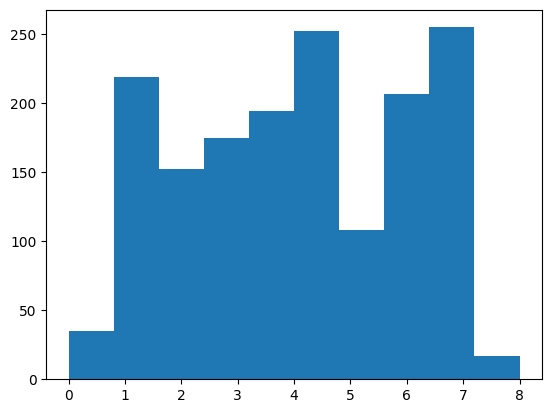

In [15]:
plt.hist(data["EDSS-2y"])
plt.show()

## Chain with 2 models

Train-test split

In [16]:
# Assuming 'data' is a pandas DataFrame
variables = ['EDSS-2y', 'T25FW-2y']

# Select complete cases
complete_cases = data.dropna(subset=variables, how='any')
len(complete_cases)

1598

In [17]:
# Select non-complete cases
non_complete_cases = data[~data.index.isin(complete_cases.index)]
len(non_complete_cases)

867

First split in fully annotated and weakly annotated dataset (for training: use both complete and non-complete, for evaluating only use complete cases)

In [18]:
# Extract targets
targets = complete_cases[variables]

# Extract features by dropping the target columns
features = complete_cases.drop(variables, axis=1)

In [19]:
# Split training and test data randomly
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)
print(len(X_train), len(y_train), len(X_test), len(y_test))

1278 1278 320 320


In [20]:
y_train

,EDSS-2y,T25FW-2y
789,6.50,64.45
1946,4.50,8.95
2130,3.00,5.75
1923,2.50,6.70
296,6.50,25.30
...,...,...
1561,4.50,6.50
2056,4.75,7.70
1656,2.00,6.30
134,0.00,5.95


In [21]:
weakly_annotated_EDSS_2y = non_complete_cases.dropna(subset=['EDSS-2y'], how='any')
len(weakly_annotated_EDSS_2y)

16

only 16 extra rows but at least it's something

In [22]:
# Extract targets
targets_1 = weakly_annotated_EDSS_2y[variables]

# Extract features by dropping the target columns
features_1 = weakly_annotated_EDSS_2y.drop(variables, axis=1)

Concatenate the weakly annotated data to the training data

In [23]:
# Assuming 'X_train' and 'features' are your DataFrames with the same columns
y_train = pd.concat([y_train, targets_1], axis=0, ignore_index=True)
y_train

,EDSS-2y,T25FW-2y
0,6.5,64.45
1,4.5,8.95
2,3.0,5.75
3,2.5,6.70
4,6.5,25.30
...,...,...
1289,7.5,NaN
1290,7.5,NaN
1291,7.0,NaN
1292,8.0,NaN


In [24]:
# Assuming 'X_train' and 'features' are your DataFrames with the same columns
X_train = pd.concat([X_train, features_1], axis=0, ignore_index=True)
X_train

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after
0,MSOAC/2534,45.0,F,WHITE,NaN,NaN,NaN,8.0,NaN,SPMS,0,0,1,0,NaN,0.0,28.65,50.35,NaN,38.5,37.0,NaN,46.0,49.5,NaN,NaN,NaN,19.95,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.814286,0.821429,0.556962,0.462025,NaN,NaN,NaN,NaN
1,MSOAC/7341,42.0,M,WHITE,EUROPE,SEVERE,N; Y,4.0,NaN,RRMS,0,0,0,0,336.0,2.0,21.90,21.70,22.4,NaN,NaN,NaN,56.5,59.5,59.5,NaN,NaN,6.50,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5,38.0,1.25,1.25,NaN,NaN,NaN,3.50,6.5,0.500000,0.500000,0.500000,0.2,0.2,0.2,0.000000,0.166667,0.166667,0.500000,0.500000,0.500000,0.0,0.2,0.0,0.000000,0.0,0.000000,0.4,0.4,0.2,0.333333,0.370370,0.296296,0.000000,0.083333,0.083333,0.657143,0.650000,0.658228,0.670886,NaN,NaN,NaN,NaN
2,MSOAC/4796,36.0,M,WHITE,EUROPE,MODERATE,Y,2.0,NaN,RRMS,0,0,0,0,505.0,2.0,20.90,33.05,31.0,NaN,NaN,NaN,36.0,48.0,50.0,NaN,NaN,6.25,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.5,31.0,1.25,1.25,NaN,NaN,NaN,2.00,2.5,0.333333,0.333333,0.166667,0.0,0.0,0.1,0.000000,0.083333,0.000000,0.333333,0.333333,0.333333,0.2,0.1,0.0,0.000000,0.0,0.000000,0.4,0.2,0.2,0.259259,0.203704,0.166667,0.000000,0.041667,0.000000,0.657143,0.607143,0.696203,0.645570,NaN,NaN,NaN,NaN
3,MSOAC/0046,34.0,F,WHITE,EUROPE,MODERATE,Y,2.0,NaN,RRMS,0,0,0,1,275.0,1.0,25.85,27.25,NaN,NaN,NaN,NaN,30.0,37.0,NaN,31.0,47.0,6.55,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,16.0,19.0,0.80,0.80,NaN,0.317460,0.206349,2.50,NaN,0.166667,NaN,0.166667,0.4,NaN,0.4,0.000000,NaN,0.000000,0.333333,NaN,0.333333,0.0,NaN,0.0,0.166667,NaN,0.166667,0.2,NaN,0.2,0.222222,NaN,0.222222,0.083333,NaN,0.083333,NaN,NaN,NaN,NaN,0.6,0.633333,0.576923,0.692308
4,MSOAC/3939,57.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,1,1,0,1,NaN,0.0,51.95,50.10,65.7,18.0,21.5,15.0,24.0,26.5,28.0,NaN,NaN,26.05,57.4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.75,6.5,0.333333,0.333333,0.250000,0.4,0.6,0.4,0.166667,0.166667,0.250000,0.500000,0.500000,0.416667,0.5,0.4,0.4,0.166667,0.0,0.250000,0.8,0.8,0.7,0.481481,0.518519,0.425926,0.208333,0.083333,0.250000,0.657143,0.600000,0.594937,0.544304,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,MSOAC/6475,51.0,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,0,1,1,1,NaN,0.0,59.30,55.00,NaN,43.0,46.0,NaN,51.5,53.5,NaN,NaN,NaN,73.25,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365079,0.349206,6.50,NaN,0.000000,NaN,0.083333,0.4,NaN,0.3,0.416667,NaN,0.416667,0.666667,NaN,0.666667,0.0,NaN,0.1,0.333333,NaN,0.333333,0.6,NaN,0.8,0.351852,NaN,0.388889,0.375000,NaN,0.375000,0.714286,0.671429,0.518987,0.

In [25]:
columns_to_keep = ['AGE', 'SEX', 'RACE', 'CONTINENT', 'MHDIAGN', 'CARDIO', 'URINARY', 'MUSCKELET', 'FATIGUE', 
                    'NHPT-before', 'PASAT_2s-before', 'PASAT_3s-before', 'SDMT-before', 'T25FW-before', 'SLEC_before','SES_before',
                    'BDI-before', 'EDSS-before', 'KFSS_M-before', 'KFSS_P-before', 'RAND36_M-before', 'RAND36_P-before', 'SF12_M-before', 
                    'SF12_P-before']
# still need to change in OE dataframe the SLEC and SES so name is consistent with the others

X_train_1 = X_train[columns_to_keep]
X_train_1

,AGE,SEX,RACE,CONTINENT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,SF12_M-before,SF12_P-before
0,45.0,F,WHITE,NaN,SPMS,0,0,1,0,28.65,38.5,46.0,NaN,19.95,NaN,NaN,NaN,6.00,NaN,NaN,0.814286,0.556962,NaN,NaN
1,42.0,M,WHITE,EUROPE,RRMS,0,0,0,0,21.90,NaN,56.5,NaN,6.50,39.5,1.25,NaN,3.50,0.296296,0.083333,0.657143,0.658228,NaN,NaN
2,36.0,M,WHITE,EUROPE,RRMS,0,0,0,0,20.90,NaN,36.0,NaN,6.25,31.5,1.25,NaN,2.00,0.166667,0.000000,0.657143,0.696203,NaN,NaN
3,34.0,F,WHITE,EUROPE,RRMS,0,0,0,1,25.85,NaN,30.0,31.0,6.55,16.0,0.80,0.317460,2.50,0.222222,0.083333,NaN,NaN,0.6,0.576923
4,57.0,M,WHITE,NaN,PPMS,1,1,0,1,51.95,18.0,24.0,NaN,26.05,NaN,NaN,NaN,5.75,0.425926,0.250000,0.657143,0.594937,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,51.0,F,WHITE,NORTH AMERICA,SPMS,0,1,1,1,59.30,43.0,51.5,NaN,73.25,NaN,NaN,0.365079,6.50,0.388889,0.375000,0.714286,0.518987,NaN,NaN
1290,33.0,M,NON-WHITE,ASIA,RRMS,0,1,1,1,37.05,NaN,36.0,35.5,47.35,9.0,0.80,0.111111,4.00,0.407407,0.083333,NaN,NaN,0.7,0.653846
1291,37.0,M,WHITE,NaN,SPMS,0,1,1,0,50.25,38.5,48.0,NaN,NaN,NaN,NaN,NaN,6.50,NaN,NaN,0.671429,0.544304,NaN,NaN
1292,38.0,M,WHITE,NaN,SPMS,0,1,1,1,70.55,NaN,59.0,NaN,26.85,NaN,NaN,NaN,6.50,NaN,NaN,0.685714,0.518987,NaN,NaN


Now we standardize columns and combine e.g. PASAT 2s 3s, RAND36 WITH SF12, ...

In [26]:
# Assuming 'X_train' is your training set
column_data_types = X_train_1.dtypes
print(column_data_types)

AGE                float64
SEX                 object
RACE                object
CONTINENT           object
MHDIAGN             object
CARDIO               int64
URINARY              int64
MUSCKELET            int64
FATIGUE              int64
NHPT-before        float64
PASAT_2s-before    float64
PASAT_3s-before    float64
SDMT-before        float64
T25FW-before       float64
SLEC_before        float64
SES_before         float64
BDI-before         float64
EDSS-before        float64
KFSS_M-before      float64
KFSS_P-before      float64
RAND36_M-before    float64
RAND36_P-before    float64
SF12_M-before      float64
SF12_P-before      float64
dtype: object


In [27]:
# Identify columns with datatype float64
float_columns = X_train_1.select_dtypes(include=['float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the specified columns and transform them
X_train_1[float_columns] = scaler.fit_transform(X_train_1[float_columns])
X_train_1

C:\Users\lenne\AppData\Local\Temp\ipykernel_8056\3843155451.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1[float_columns] = scaler.fit_transform(X_train_1[float_columns])


,AGE,SEX,RACE,CONTINENT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,SF12_M-before,SF12_P-before
0,0.192713,F,WHITE,NaN,SPMS,0,0,1,0,0.108002,0.331800,0.036196,NaN,0.776074,NaN,NaN,NaN,1.191719,NaN,NaN,2.122188,-0.561127,NaN,NaN
1,-0.084879,M,WHITE,EUROPE,RRMS,0,0,0,0,-0.315849,NaN,0.928879,NaN,-0.327995,1.367646,0.772067,NaN,-0.174408,0.559674,-0.494539,-0.022723,0.626569,NaN,NaN
2,-0.640064,M,WHITE,EUROPE,RRMS,0,0,0,0,-0.378642,NaN,-0.813977,NaN,-0.348517,0.754756,0.772067,NaN,-0.994084,-0.456551,-1.104041,-0.022723,1.071955,NaN,NaN
3,-0.825125,F,WHITE,EUROPE,RRMS,0,0,0,1,-0.067818,NaN,-1.324081,-1.016695,-0.323891,-0.432718,-0.952735,1.019532,-0.720859,-0.021026,-0.494539,NaN,NaN,-0.893340,-0.827191
4,1.303081,M,WHITE,NaN,PPMS,1,1,0,1,1.571075,-1.422771,-1.834185,NaN,1.276804,NaN,NaN,NaN,1.055106,1.575899,0.724464,-0.022723,-0.115741,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,0.747897,F,WHITE,NORTH AMERICA,SPMS,0,1,1,1,2.032602,0.716950,0.503792,NaN,5.151307,NaN,NaN,1.349572,1.464944,1.285549,1.638717,0.757245,-1.006513,NaN,NaN
1290,-0.917656,M,NON-WHITE,ASIA,RRMS,0,1,1,1,0.635462,NaN,-0.813977,-0.739170,3.025256,-0.968997,-0.952735,-0.410644,0.098817,1.430724,-0.494539,NaN,NaN,0.179712,0.050268
1291,-0.547533,M,WHITE,NaN,SPMS,0,1,1,0,1.464327,0.331800,0.206231,NaN,NaN,NaN,NaN,NaN,1.464944,NaN,NaN,0.172269,-0.709589,NaN,NaN
1292,-0.455002,M,WHITE,NaN,SPMS,0,1,1,1,2.739022,NaN,1.141422,NaN,1.342474,NaN,NaN,NaN,1.464944,NaN,NaN,0.367261,-1.006513,NaN,NaN


Ask about PASAT combining

not standardizing more interpretable !!!

In [28]:
# Create a new column 'RAND36_M-before' and fill it with values from 'SF12_M-before'
X_train_1['M_R36-SF12-before'] = X_train_1['RAND36_M-before'].fillna(X_train_1['SF12_M-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_train_1['M_R36-SF12'] = X_train_1.apply(lambda row: 1 if pd.notna(row['RAND36_M-before']) else (0 if pd.notna(row['SF12_M-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_train_1 = X_train_1.drop(['SF12_M-before'], axis=1)

# Create a new column 'RAND36_M-before' and fill it with values from 'SF12_M-before'
X_train_1['P_R36-SF12-before'] = X_train_1['RAND36_P-before'].fillna(X_train_1['SF12_P-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_train_1['P_R36-SF12'] = X_train_1.apply(lambda row: 1 if pd.notna(row['RAND36_P-before']) else (0 if pd.notna(row['SF12_P-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_train_1 = X_train_1.drop(['SF12_P-before'], axis=1)

X_train_1

C:\Users\lenne\AppData\Local\Temp\ipykernel_8056\1570734738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1['M_R36-SF12-before'] = X_train_1['RAND36_M-before'].fillna(X_train_1['SF12_M-before'])
C:\Users\lenne\AppData\Local\Temp\ipykernel_8056\1570734738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1['M_R36-SF12'] = X_train_1.apply(lambda row: 1 if pd.notna(row['RAND36_M-before']) else (0 if pd.notna(row['SF12_M-before']) else np.nan), axis=1)


,AGE,SEX,RACE,CONTINENT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,M_R36-SF12-before,M_R36-SF12,P_R36-SF12-before,P_R36-SF12
0,0.192713,F,WHITE,NaN,SPMS,0,0,1,0,0.108002,0.331800,0.036196,NaN,0.776074,NaN,NaN,NaN,1.191719,NaN,NaN,2.122188,-0.561127,2.122188,1.0,-0.561127,1.0
1,-0.084879,M,WHITE,EUROPE,RRMS,0,0,0,0,-0.315849,NaN,0.928879,NaN,-0.327995,1.367646,0.772067,NaN,-0.174408,0.559674,-0.494539,-0.022723,0.626569,-0.022723,1.0,0.626569,1.0
2,-0.640064,M,WHITE,EUROPE,RRMS,0,0,0,0,-0.378642,NaN,-0.813977,NaN,-0.348517,0.754756,0.772067,NaN,-0.994084,-0.456551,-1.104041,-0.022723,1.071955,-0.022723,1.0,1.071955,1.0
3,-0.825125,F,WHITE,EUROPE,RRMS,0,0,0,1,-0.067818,NaN,-1.324081,-1.016695,-0.323891,-0.432718,-0.952735,1.019532,-0.720859,-0.021026,-0.494539,NaN,NaN,-0.893340,0.0,-0.827191,0.0
4,1.303081,M,WHITE,NaN,PPMS,1,1,0,1,1.571075,-1.422771,-1.834185,NaN,1.276804,NaN,NaN,NaN,1.055106,1.575899,0.724464,-0.022723,-0.115741,-0.022723,1.0,-0.115741,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,0.747897,F,WHITE,NORTH AMERICA,SPMS,0,1,1,1,2.032602,0.716950,0.503792,NaN,5.151307,NaN,NaN,1.349572,1.464944,1.285549,1.638717,0.757245,-1.006513,0.757245,1.0,-1.006513,1.0
1290,-0.917656,M,NON-WHITE,ASIA,RRMS,0,1,1,1,0.635462,NaN,-0.813977,-0.739170,3.025256,-0.968997,-0.952735,-0.410644,0.098817,1.430724,-0.494539,NaN,NaN,0.179712,0.0,0.050268,0.0
1291,-0.547533,M,WHITE,NaN,SPMS,0,1,1,0,1.464327,0.331800,0.206231,NaN,NaN,NaN,NaN,NaN,1.464944,NaN,NaN,0.172269,-0.709589,0.172269,1.0,-0.709589,1.0
1292,-0.455002,M,WHITE,NaN,SPMS,0,1,1,1,2.739022,NaN,1.141422,NaN,1.342474,NaN,NaN,NaN,1.464944,NaN,NaN,0.367261,-1.006513,0.367261,1.0,-1.006513,1.0


In [29]:
# Select columns with datatype 'object' excluding 'USUBJID'
object_columns = X_train_1.select_dtypes(include=['object'])

# Get unique values for each object column
unique_values_per_column = {col: X_train_1[col].unique() for col in object_columns.columns}

# Print or inspect the unique values
for col, values in unique_values_per_column.items():
    print(f"Column '{col}': {values}")

Column 'SEX': ['F' 'M']
Column 'RACE': ['WHITE' 'NON-WHITE' nan]
Column 'CONTINENT': [nan 'EUROPE' 'NORTH AMERICA' 'ASIA' 'EURASIA' 'OCEANIA' 'SOUTH AMERICA']
Column 'MHDIAGN': ['SPMS' 'RRMS' 'PPMS']


In [30]:
# Select columns with datatype 'object' excluding 'USUBJID'
object_columns = X_train_1.select_dtypes(include=['object'])

# Replace missing values with a specific label for each column
#missing_value_label = 'missing'  # Replace with your desired label
#for column in object_columns.columns:
#    X_train_1[column] = X_train_1[column].fillna(missing_value_label)

# Apply one-hot encoding to object columns with dtype=int
X_train_1 = pd.get_dummies(X_train_1, columns=object_columns.columns, dtype=int)#drop_first=True
X_train_1.head(50)

,AGE,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,M_R36-SF12-before,M_R36-SF12,P_R36-SF12-before,P_R36-SF12,SEX_F,SEX_M,RACE_NON-WHITE,RACE_WHITE,CONTINENT_ASIA,CONTINENT_EURASIA,CONTINENT_EUROPE,CONTINENT_NORTH AMERICA,CONTINENT_OCEANIA,CONTINENT_SOUTH AMERICA,MHDIAGN_PPMS,MHDIAGN_RRMS,MHDIAGN_SPMS
0,0.192713,0,0,1,0,0.108002,0.331800,0.036196,NaN,0.776074,NaN,NaN,NaN,1.191719,NaN,NaN,2.122188,-0.561127,2.122188,1.0,-0.561127,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,-0.084879,0,0,0,0,-0.315849,NaN,0.928879,NaN,-0.327995,1.367646,0.772067,NaN,-0.174408,0.559674,-0.494539,-0.022723,0.626569,-0.022723,1.0,0.626569,1.0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,-0.640064,0,0,0,0,-0.378642,NaN,-0.813977,NaN,-0.348517,0.754756,0.772067,NaN,-0.994084,-0.456551,-1.104041,-0.022723,1.071955,-0.022723,1.0,1.071955,1.0,0,1,0,1,0,0,1,0,0,0,0,1,0
3,-0.825125,0,0,0,1,-0.067818,NaN,-1.324081,-1.016695,-0.323891,-0.432718,-0.952735,1.019532,-0.720859,-0.021026,-0.494539,NaN,NaN,-0.893340,0.0,-0.827191,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,1.303081,1,1,0,1,1.571075,-1.422771,-1.834185,NaN,1.276804,NaN,NaN,NaN,1.055106,1.575899,0.724464,-0.022723,-0.115741,-0.022723,1.0,-0.115741,1.0,0,1,0,1,0,0,0,0,0,0,1,0,0
5,1.210550,1,1,1,1,-0.413178,0.460184,0.886370,NaN,-0.204865,NaN,NaN,NaN,-0.037795,0.124149,0.419713,-0.607699,-1.006513,-0.607699,1.0,-1.006513,1.0,0,1,0,1,0,0,0,0,0,0,1,0,0
6,0.007651,0,1,1,1,-0.130611,-1.593949,-1.366590,NaN,-0.488065,NaN,NaN,NaN,0.098817,0.414499,2.552969,-0.217715,-0.561127,-0.217715,1.0,-0.561127,1.0,0,1,0,1,0,0,0,0,0,0,1,0,0
7,-1.565371,1,0,0,1,1.015359,NaN,0.588809,0.617618,0.082439,-1.083914,-0.186156,-0.300630,0.098817,1.430724,-0.494539,NaN,NaN,0.537396,0.0,1.366456,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0
8,-1.842963,1,1,0,0,-0.494809,NaN,1.141422,1.604373,-0.594778,-0.432718,-0.186156,0.139424,-2.086986,-1.763126,-1.104041,NaN,NaN,0.537396,0.0,0.050268,0.0,0,1,0,1,0,0,1,0,0,0,0,1,0
9,-0.084879,0,0,1,0,0.280682,NaN,0.588809,NaN,-0.615300,0.793062,0.772067,NaN,-0.857472,-0.456551,0.419713,-0.217715,1.665803,-0.217715,1.0,1.665803,1.0,0,1,0,1,0,0,0,1,0,0,0,1,0


In [31]:
missing_percentage_data = (X_train_1.isnull().sum() / len(X_train_1)) * 100
missing_data = pd.DataFrame({'Column Name': missing_percentage_data.index, 'Missing Percentage': missing_percentage_data.values})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
missing_data.head(60)

,Column Name,Missing Percentage
8,SDMT-before,68.083462
12,BDI-before,58.191654
6,PASAT_2s-before,53.941267
10,SLEC_before,49.690881
11,SES_before,49.613601
16,RAND36_M-before,36.321484
17,RAND36_P-before,36.321484
15,KFSS_P-before,17.851623
14,KFSS_M-before,17.851623
21,P_R36-SF12,4.559505


In [32]:
rf_regressor_1 = RandomForestRegressor()
# run first for EDSS-2y (first output)
rf_regressor_1.fit(X_train_1, y_train.iloc[:, 0])

RandomForestRegressor()

In [33]:
# Predict values for the test data
y_train_pred = rf_regressor_1.predict(X_train_1)

# Evaluate the performance of the model
mse = mean_squared_error(y_train.iloc[:, 0], y_train_pred)
r2 = r2_score(y_train.iloc[:, 0], y_train_pred)

print("Mean Squared Error:", mse)
print("R-squared (coefficient of determination):", r2)

Mean Squared Error: 0.0658182670015456
R-squared (coefficient of determination): 0.982414338308786


In [34]:
# Add the predictions as a new column to 'X_train'
X_train['pred_EDSS-2y'] = y_train_pred
X_train

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y
0,MSOAC/2534,45.0,F,WHITE,NaN,NaN,NaN,8.0,NaN,SPMS,0,0,1,0,NaN,0.0,28.65,50.35,NaN,38.5,37.0,NaN,46.0,49.5,NaN,NaN,NaN,19.95,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.814286,0.821429,0.556962,0.462025,NaN,NaN,NaN,NaN,6.3075
1,MSOAC/7341,42.0,M,WHITE,EUROPE,SEVERE,N; Y,4.0,NaN,RRMS,0,0,0,0,336.0,2.0,21.90,21.70,22.4,NaN,NaN,NaN,56.5,59.5,59.5,NaN,NaN,6.50,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5,38.0,1.25,1.25,NaN,NaN,NaN,3.50,6.5,0.500000,0.500000,0.500000,0.2,0.2,0.2,0.000000,0.166667,0.166667,0.500000,0.500000,0.500000,0.0,0.2,0.0,0.000000,0.0,0.000000,0.4,0.4,0.2,0.333333,0.370370,0.296296,0.000000,0.083333,0.083333,0.657143,0.650000,0.658228,0.670886,NaN,NaN,NaN,NaN,4.1900
2,MSOAC/4796,36.0,M,WHITE,EUROPE,MODERATE,Y,2.0,NaN,RRMS,0,0,0,0,505.0,2.0,20.90,33.05,31.0,NaN,NaN,NaN,36.0,48.0,50.0,NaN,NaN,6.25,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.5,31.0,1.25,1.25,NaN,NaN,NaN,2.00,2.5,0.333333,0.333333,0.166667,0.0,0.0,0.1,0.000000,0.083333,0.000000,0.333333,0.333333,0.333333,0.2,0.1,0.0,0.000000,0.0,0.000000,0.4,0.2,0.2,0.259259,0.203704,0.166667,0.000000,0.041667,0.000000,0.657143,0.607143,0.696203,0.645570,NaN,NaN,NaN,NaN,2.5125
3,MSOAC/0046,34.0,F,WHITE,EUROPE,MODERATE,Y,2.0,NaN,RRMS,0,0,0,1,275.0,1.0,25.85,27.25,NaN,NaN,NaN,NaN,30.0,37.0,NaN,31.0,47.0,6.55,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,16.0,19.0,0.80,0.80,NaN,0.317460,0.206349,2.50,NaN,0.166667,NaN,0.166667,0.4,NaN,0.4,0.000000,NaN,0.000000,0.333333,NaN,0.333333,0.0,NaN,0.0,0.166667,NaN,0.166667,0.2,NaN,0.2,0.222222,NaN,0.222222,0.083333,NaN,0.083333,NaN,NaN,NaN,NaN,0.6,0.633333,0.576923,0.692308,2.4900
4,MSOAC/3939,57.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,1,1,0,1,NaN,0.0,51.95,50.10,65.7,18.0,21.5,15.0,24.0,26.5,28.0,NaN,NaN,26.05,57.4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.75,6.5,0.333333,0.333333,0.250000,0.4,0.6,0.4,0.166667,0.166667,0.250000,0.500000,0.500000,0.416667,0.5,0.4,0.4,0.166667,0.0,0.250000,0.8,0.8,0.7,0.481481,0.518519,0.425926,0.208333,0.083333,0.250000,0.657143,0.600000,0.594937,0.544304,NaN,NaN,NaN,NaN,6.3650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,MSOAC/6475,51.0,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,0,1,1,1,NaN,0.0,59.30,55.00,NaN,43.0,46.0,NaN,51.5,53.5,NaN,NaN,NaN,73.25,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365079,0.349206,6.50,NaN,0.000000,NaN,0.083333,0.4,NaN,0.3,0.416667,NaN,0.416667,0.666667,NaN,0.666667,0.0,NaN,0.1,0.333333,NaN,0.333333,0.6,NaN,0.8,0.351852,NaN,0.388889

In [35]:
y_train = y_train.dropna(subset=['T25FW-2y'], how='any')
y_train

,EDSS-2y,T25FW-2y
0,6.50,64.45
1,4.50,8.95
2,3.00,5.75
3,2.50,6.70
4,6.50,25.30
...,...,...
1273,4.50,6.50
1274,4.75,7.70
1275,2.00,6.30
1276,0.00,5.95


In [36]:
merged_df = pd.concat([X_train, y_train['T25FW-2y']], axis=1)
merged_df

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y,T25FW-2y
0,MSOAC/2534,45.0,F,WHITE,NaN,NaN,NaN,8.0,NaN,SPMS,0,0,1,0,NaN,0.0,28.65,50.35,NaN,38.5,37.0,NaN,46.0,49.5,NaN,NaN,NaN,19.95,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.814286,0.821429,0.556962,0.462025,NaN,NaN,NaN,NaN,6.3075,64.45
1,MSOAC/7341,42.0,M,WHITE,EUROPE,SEVERE,N; Y,4.0,NaN,RRMS,0,0,0,0,336.0,2.0,21.90,21.70,22.4,NaN,NaN,NaN,56.5,59.5,59.5,NaN,NaN,6.50,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5,38.0,1.25,1.25,NaN,NaN,NaN,3.50,6.5,0.500000,0.500000,0.500000,0.2,0.2,0.2,0.000000,0.166667,0.166667,0.500000,0.500000,0.500000,0.0,0.2,0.0,0.000000,0.0,0.000000,0.4,0.4,0.2,0.333333,0.370370,0.296296,0.000000,0.083333,0.083333,0.657143,0.650000,0.658228,0.670886,NaN,NaN,NaN,NaN,4.1900,8.95
2,MSOAC/4796,36.0,M,WHITE,EUROPE,MODERATE,Y,2.0,NaN,RRMS,0,0,0,0,505.0,2.0,20.90,33.05,31.0,NaN,NaN,NaN,36.0,48.0,50.0,NaN,NaN,6.25,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.5,31.0,1.25,1.25,NaN,NaN,NaN,2.00,2.5,0.333333,0.333333,0.166667,0.0,0.0,0.1,0.000000,0.083333,0.000000,0.333333,0.333333,0.333333,0.2,0.1,0.0,0.000000,0.0,0.000000,0.4,0.2,0.2,0.259259,0.203704,0.166667,0.000000,0.041667,0.000000,0.657143,0.607143,0.696203,0.645570,NaN,NaN,NaN,NaN,2.5125,5.75
3,MSOAC/0046,34.0,F,WHITE,EUROPE,MODERATE,Y,2.0,NaN,RRMS,0,0,0,1,275.0,1.0,25.85,27.25,NaN,NaN,NaN,NaN,30.0,37.0,NaN,31.0,47.0,6.55,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,16.0,19.0,0.80,0.80,NaN,0.317460,0.206349,2.50,NaN,0.166667,NaN,0.166667,0.4,NaN,0.4,0.000000,NaN,0.000000,0.333333,NaN,0.333333,0.0,NaN,0.0,0.166667,NaN,0.166667,0.2,NaN,0.2,0.222222,NaN,0.222222,0.083333,NaN,0.083333,NaN,NaN,NaN,NaN,0.6,0.633333,0.576923,0.692308,2.4900,6.70
4,MSOAC/3939,57.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,1,1,0,1,NaN,0.0,51.95,50.10,65.7,18.0,21.5,15.0,24.0,26.5,28.0,NaN,NaN,26.05,57.4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.75,6.5,0.333333,0.333333,0.250000,0.4,0.6,0.4,0.166667,0.166667,0.250000,0.500000,0.500000,0.416667,0.5,0.4,0.4,0.166667,0.0,0.250000,0.8,0.8,0.7,0.481481,0.518519,0.425926,0.208333,0.083333,0.250000,0.657143,0.600000,0.594937,0.544304,NaN,NaN,NaN,NaN,6.3650,25.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,MSOAC/6475,51.0,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,0,1,1,1,NaN,0.0,59.30,55.00,NaN,43.0,46.0,NaN,51.5,53.5,NaN,NaN,NaN,73.25,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365079,0.349206,6.50,NaN,0.000000,NaN,0.083333,0.4,NaN,0.3,0.416667,NaN,0.416667,0.666667,NaN,0.666667,0.0,NaN,0.1,0.333333,NaN,0.

In [37]:
# Assuming 'X_train' is your training set
X_train = merged_df.dropna(subset=['T25FW-2y'], how='any')
X_train

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y,T25FW-2y
0,MSOAC/2534,45.0,F,WHITE,NaN,NaN,NaN,8.0,NaN,SPMS,0,0,1,0,NaN,0.0,28.65,50.35,NaN,38.5,37.0,NaN,46.0,49.5,NaN,NaN,NaN,19.95,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.814286,0.821429,0.556962,0.462025,NaN,NaN,NaN,NaN,6.3075,64.45
1,MSOAC/7341,42.0,M,WHITE,EUROPE,SEVERE,N; Y,4.0,NaN,RRMS,0,0,0,0,336.0,2.0,21.90,21.70,22.4,NaN,NaN,NaN,56.5,59.5,59.5,NaN,NaN,6.50,22.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5,38.0,1.25,1.25,NaN,NaN,NaN,3.50,6.5,0.500000,0.500000,0.500000,0.2,0.2,0.2,0.000000,0.166667,0.166667,0.500000,0.500000,0.500000,0.0,0.2,0.0,0.000000,0.0,0.000000,0.4,0.4,0.2,0.333333,0.370370,0.296296,0.000000,0.083333,0.083333,0.657143,0.650000,0.658228,0.670886,NaN,NaN,NaN,NaN,4.1900,8.95
2,MSOAC/4796,36.0,M,WHITE,EUROPE,MODERATE,Y,2.0,NaN,RRMS,0,0,0,0,505.0,2.0,20.90,33.05,31.0,NaN,NaN,NaN,36.0,48.0,50.0,NaN,NaN,6.25,5.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.5,31.0,1.25,1.25,NaN,NaN,NaN,2.00,2.5,0.333333,0.333333,0.166667,0.0,0.0,0.1,0.000000,0.083333,0.000000,0.333333,0.333333,0.333333,0.2,0.1,0.0,0.000000,0.0,0.000000,0.4,0.2,0.2,0.259259,0.203704,0.166667,0.000000,0.041667,0.000000,0.657143,0.607143,0.696203,0.645570,NaN,NaN,NaN,NaN,2.5125,5.75
3,MSOAC/0046,34.0,F,WHITE,EUROPE,MODERATE,Y,2.0,NaN,RRMS,0,0,0,1,275.0,1.0,25.85,27.25,NaN,NaN,NaN,NaN,30.0,37.0,NaN,31.0,47.0,6.55,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,16.0,19.0,0.80,0.80,NaN,0.317460,0.206349,2.50,NaN,0.166667,NaN,0.166667,0.4,NaN,0.4,0.000000,NaN,0.000000,0.333333,NaN,0.333333,0.0,NaN,0.0,0.166667,NaN,0.166667,0.2,NaN,0.2,0.222222,NaN,0.222222,0.083333,NaN,0.083333,NaN,NaN,NaN,NaN,0.600000,0.633333,0.576923,0.692308,2.4900,6.70
4,MSOAC/3939,57.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,1,1,0,1,NaN,0.0,51.95,50.10,65.7,18.0,21.5,15.0,24.0,26.5,28.0,NaN,NaN,26.05,57.40,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.75,6.5,0.333333,0.333333,0.250000,0.4,0.6,0.4,0.166667,0.166667,0.250000,0.500000,0.500000,0.416667,0.5,0.4,0.4,0.166667,0.0,0.250000,0.8,0.8,0.7,0.481481,0.518519,0.425926,0.208333,0.083333,0.250000,0.657143,0.600000,0.594937,0.544304,NaN,NaN,NaN,NaN,6.3650,25.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,MSOAC/5618,38.0,M,WHITE,NaN,NaN,NaN,NaN,NaN,PPMS,0,1,1,0,NaN,0.0,22.35,22.85,24.3,44.0,52.5,52.0,53.0,57.5,58.0,NaN,NaN,5.05,7.65,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,5.0,0.500000,0.500000,0.500000,0.0,0.0,0.0,0.416667,0.500000,0.333333,0.500000,0.500000,0.500000,0.0,0.0,0.0,0.083333,

In [38]:
X_train.drop('T25FW-2y', axis=1)

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y
0,MSOAC/2534,45.0,F,WHITE,NaN,NaN,NaN,8.0,NaN,SPMS,0,0,1,0,NaN,0.0,28.65,50.35,NaN,38.5,37.0,NaN,46.0,49.5,NaN,NaN,NaN,19.95,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.814286,0.821429,0.556962,0.462025,NaN,NaN,NaN,NaN,6.3075
1,MSOAC/7341,42.0,M,WHITE,EUROPE,SEVERE,N; Y,4.0,NaN,RRMS,0,0,0,0,336.0,2.0,21.90,21.70,22.4,NaN,NaN,NaN,56.5,59.5,59.5,NaN,NaN,6.50,22.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5,38.0,1.25,1.25,NaN,NaN,NaN,3.50,6.5,0.500000,0.500000,0.500000,0.2,0.2,0.2,0.000000,0.166667,0.166667,0.500000,0.500000,0.500000,0.0,0.2,0.0,0.000000,0.0,0.000000,0.4,0.4,0.2,0.333333,0.370370,0.296296,0.000000,0.083333,0.083333,0.657143,0.650000,0.658228,0.670886,NaN,NaN,NaN,NaN,4.1900
2,MSOAC/4796,36.0,M,WHITE,EUROPE,MODERATE,Y,2.0,NaN,RRMS,0,0,0,0,505.0,2.0,20.90,33.05,31.0,NaN,NaN,NaN,36.0,48.0,50.0,NaN,NaN,6.25,5.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.5,31.0,1.25,1.25,NaN,NaN,NaN,2.00,2.5,0.333333,0.333333,0.166667,0.0,0.0,0.1,0.000000,0.083333,0.000000,0.333333,0.333333,0.333333,0.2,0.1,0.0,0.000000,0.0,0.000000,0.4,0.2,0.2,0.259259,0.203704,0.166667,0.000000,0.041667,0.000000,0.657143,0.607143,0.696203,0.645570,NaN,NaN,NaN,NaN,2.5125
3,MSOAC/0046,34.0,F,WHITE,EUROPE,MODERATE,Y,2.0,NaN,RRMS,0,0,0,1,275.0,1.0,25.85,27.25,NaN,NaN,NaN,NaN,30.0,37.0,NaN,31.0,47.0,6.55,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,16.0,19.0,0.80,0.80,NaN,0.317460,0.206349,2.50,NaN,0.166667,NaN,0.166667,0.4,NaN,0.4,0.000000,NaN,0.000000,0.333333,NaN,0.333333,0.0,NaN,0.0,0.166667,NaN,0.166667,0.2,NaN,0.2,0.222222,NaN,0.222222,0.083333,NaN,0.083333,NaN,NaN,NaN,NaN,0.600000,0.633333,0.576923,0.692308,2.4900
4,MSOAC/3939,57.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,1,1,0,1,NaN,0.0,51.95,50.10,65.7,18.0,21.5,15.0,24.0,26.5,28.0,NaN,NaN,26.05,57.40,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.75,6.5,0.333333,0.333333,0.250000,0.4,0.6,0.4,0.166667,0.166667,0.250000,0.500000,0.500000,0.416667,0.5,0.4,0.4,0.166667,0.0,0.250000,0.8,0.8,0.7,0.481481,0.518519,0.425926,0.208333,0.083333,0.250000,0.657143,0.600000,0.594937,0.544304,NaN,NaN,NaN,NaN,6.3650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,MSOAC/5618,38.0,M,WHITE,NaN,NaN,NaN,NaN,NaN,PPMS,0,1,1,0,NaN,0.0,22.35,22.85,24.3,44.0,52.5,52.0,53.0,57.5,58.0,NaN,NaN,5.05,7.65,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,5.0,0.500000,0.500000,0.500000,0.0,0.0,0.0,0.416667,0.500000,0.333333,0.500000,0.500000,0.500000,0.0,0.0,0.0,0.083333,0.0,0.083333,0.6,0.6,0.6,0.333333,0.3333

In [39]:
weakly_annotated_T25FW_2y = non_complete_cases.dropna(subset=['T25FW-2y'], how='any')
len(weakly_annotated_T25FW_2y)

70

In [40]:
# Extract targets
targets_2 = weakly_annotated_T25FW_2y[variables]

# Extract features by dropping the target columns
features_2 = weakly_annotated_T25FW_2y.drop(variables, axis=1)

# Assuming 'X_train' and 'features' are your DataFrames with the same columns
y_train = pd.concat([y_train, targets_2], axis=0, ignore_index=True)
y_train

,EDSS-2y,T25FW-2y
0,6.5,64.45
1,4.5,8.95
2,3.0,5.75
3,2.5,6.70
4,6.5,25.30
...,...,...
1343,NaN,8.90
1344,NaN,8.55
1345,NaN,9.10
1346,NaN,8.15


In [41]:
# Assuming 'X_train' and 'features' are your DataFrames with the same columns
X_train = pd.concat([X_train, features_2], axis=0, ignore_index=True)
X_train

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y,T25FW-2y
0,MSOAC/2534,45.0,F,WHITE,NaN,NaN,NaN,8.0,NaN,SPMS,0,0,1,0,NaN,0.0,28.65,50.35,NaN,38.5,37.0,NaN,46.0,49.5,NaN,NaN,NaN,19.95,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.814286,0.821429,0.556962,0.462025,NaN,NaN,NaN,NaN,6.3075,64.45
1,MSOAC/7341,42.0,M,WHITE,EUROPE,SEVERE,N; Y,4.0,NaN,RRMS,0,0,0,0,336.0,2.0,21.90,21.70,22.4,NaN,NaN,NaN,56.5,59.5,59.5,NaN,NaN,6.50,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5,38.0,1.25,1.25,NaN,NaN,NaN,3.50,6.5,0.500000,0.500000,0.500000,0.2,0.2,0.2,0.000000,0.166667,0.166667,0.500000,0.500000,0.500000,0.0,0.2,0.0,0.000000,0.0,0.000000,0.4,0.4,0.2,0.333333,0.370370,0.296296,0.000000,0.083333,0.083333,0.657143,0.650000,0.658228,0.670886,NaN,NaN,NaN,NaN,4.1900,8.95
2,MSOAC/4796,36.0,M,WHITE,EUROPE,MODERATE,Y,2.0,NaN,RRMS,0,0,0,0,505.0,2.0,20.90,33.05,31.0,NaN,NaN,NaN,36.0,48.0,50.0,NaN,NaN,6.25,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.5,31.0,1.25,1.25,NaN,NaN,NaN,2.00,2.5,0.333333,0.333333,0.166667,0.0,0.0,0.1,0.000000,0.083333,0.000000,0.333333,0.333333,0.333333,0.2,0.1,0.0,0.000000,0.0,0.000000,0.4,0.2,0.2,0.259259,0.203704,0.166667,0.000000,0.041667,0.000000,0.657143,0.607143,0.696203,0.645570,NaN,NaN,NaN,NaN,2.5125,5.75
3,MSOAC/0046,34.0,F,WHITE,EUROPE,MODERATE,Y,2.0,NaN,RRMS,0,0,0,1,275.0,1.0,25.85,27.25,NaN,NaN,NaN,NaN,30.0,37.0,NaN,31.0,47.0,6.55,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,16.0,19.0,0.80,0.80,NaN,0.31746,0.206349,2.50,NaN,0.166667,NaN,0.166667,0.4,NaN,0.4,0.000000,NaN,0.000000,0.333333,NaN,0.333333,0.0,NaN,0.0,0.166667,NaN,0.166667,0.2,NaN,0.2,0.222222,NaN,0.222222,0.083333,NaN,0.083333,NaN,NaN,NaN,NaN,0.6,0.633333,0.576923,0.692308,2.4900,6.70
4,MSOAC/3939,57.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,1,1,0,1,NaN,0.0,51.95,50.10,65.7,18.0,21.5,15.0,24.0,26.5,28.0,NaN,NaN,26.05,57.4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.75,6.5,0.333333,0.333333,0.250000,0.4,0.6,0.4,0.166667,0.166667,0.250000,0.500000,0.500000,0.416667,0.5,0.4,0.4,0.166667,0.0,0.250000,0.8,0.8,0.7,0.481481,0.518519,0.425926,0.208333,0.083333,0.250000,0.657143,0.600000,0.594937,0.544304,NaN,NaN,NaN,NaN,6.3650,25.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,MSOAC/3492,NaN,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,N,SPMS,0,1,1,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.55,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [42]:
# Assuming 'X_train' is your training set and 'columns_to_keep' is defined as mentioned in your code
columns_to_keep = ['AGE', 'SEX', 'RACE', 'CONTINENT', 'MHDIAGN', 'CARDIO', 'URINARY', 'MUSCKELET', 'FATIGUE', 
                    'NHPT-before', 'PASAT_2s-before', 'PASAT_3s-before', 'SDMT-before', 'T25FW-before', 'SLEC_before','SES_before',
                    'BDI-before', 'EDSS-before', 'KFSS_M-before', 'KFSS_P-before', 'RAND36_M-before', 'RAND36_P-before', 'SF12_M-before', 
                    'SF12_P-before', 'pred_EDSS-2y']

# Create a new DataFrame 'X_train_2' based on 'columns_to_keep'
X_train_2 = X_train[columns_to_keep]

# Identify columns with datatype float64
float_columns = X_train_2.select_dtypes(include=['float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the specified columns and transform them
X_train_2[float_columns] = scaler.fit_transform(X_train_2[float_columns])

# Create a new column 'M_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_train_2['M_R36-SF12-before'] = X_train_2['RAND36_M-before'].fillna(X_train_2['SF12_M-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_train_2['M_R36-SF12'] = X_train_2.apply(lambda row: 1 if pd.notna(row['RAND36_M-before']) else (0 if pd.notna(row['SF12_M-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_train_2 = X_train_2.drop(['SF12_M-before'], axis=1)

# Create a new column 'P_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_train_2['P_R36-SF12-before'] = X_train_2['RAND36_P-before'].fillna(X_train_2['SF12_P-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_train_2['P_R36-SF12'] = X_train_2.apply(lambda row: 1 if pd.notna(row['RAND36_P-before']) else (0 if pd.notna(row['SF12_P-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_train_2 = X_train_2.drop(['SF12_P-before'], axis=1)

# Select columns with datatype 'object' excluding 'USUBJID'
object_columns = X_train_2.select_dtypes(include=['object'])

# Replace missing values with a specific label for each column
#missing_value_label = 'missing'  # Replace with your desired label
#for column in object_columns.columns:
#    X_train_2[column] = X_train_2[column].fillna(missing_value_label)

# Apply one-hot encoding to object columns with dtype=int
X_train_2 = pd.get_dummies(X_train_2, columns=object_columns.columns, dtype=int)
X_train_2

C:\Users\lenne\AppData\Local\Temp\ipykernel_8056\4186016990.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_2[float_columns] = scaler.fit_transform(X_train_2[float_columns])
C:\Users\lenne\AppData\Local\Temp\ipykernel_8056\4186016990.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_2['M_R36-SF12-before'] = X_train_2['RAND36_M-before'].fillna(X_train_2['SF12_M-before'])
C:\Users\lenne\AppData\Local\Temp\ipykernel_8056\4186016990.py:23: SettingWithCopyWarning: 
A value is trying to be

,AGE,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,pred_EDSS-2y,M_R36-SF12-before,M_R36-SF12,P_R36-SF12-before,P_R36-SF12,SEX_F,SEX_M,RACE_NON-WHITE,RACE_WHITE,CONTINENT_ASIA,CONTINENT_EURASIA,CONTINENT_EUROPE,CONTINENT_NORTH AMERICA,CONTINENT_OCEANIA,CONTINENT_SOUTH AMERICA,MHDIAGN_PPMS,MHDIAGN_RRMS,MHDIAGN_SPMS
0,0.193529,0,0,1,0,0.127090,0.325253,0.033886,NaN,0.867944,NaN,NaN,NaN,1.138236,NaN,NaN,2.115203,-0.567030,1.289844,2.115203,1.0,-0.567030,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,-0.084370,0,0,0,0,-0.309222,NaN,0.926547,NaN,-0.348439,1.363105,0.770600,NaN,-0.217909,0.564968,-0.490433,-0.022206,0.618596,0.151271,-0.022206,1.0,0.618596,1.0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,-0.640168,0,0,0,0,-0.373861,NaN,-0.816267,NaN,-0.371048,0.751130,0.770600,NaN,-1.031595,-0.451494,-1.100647,-0.022206,1.063205,-0.750715,-0.022206,1.0,1.063205,1.0,0,1,0,1,0,0,1,0,0,0,0,1,0
3,-0.825434,0,0,0,1,-0.053899,NaN,-1.326359,-1.029629,-0.343917,-0.434571,-0.975806,1.035225,-0.760366,-0.015867,-0.490433,NaN,NaN,-0.762813,-0.920826,0.0,-0.834054,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,1.305125,1,1,0,1,1.633174,-1.431521,-1.836451,NaN,1.419612,NaN,NaN,NaN,1.002621,1.581431,0.729994,-0.022206,-0.122420,1.320761,-0.022206,1.0,-0.122420,1.0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,NaN,0,1,1,1,NaN,NaN,NaN,NaN,-0.072605,NaN,NaN,NaN,0.324549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,0,1,0,0,0,0,1
1344,NaN,1,1,0,1,NaN,NaN,NaN,NaN,-0.167564,NaN,NaN,NaN,-1.031595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,0,1,0,0,1,0,0
1345,NaN,0,1,1,1,NaN,NaN,NaN,NaN,-0.095214,NaN,NaN,NaN,1.409465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,0,1,0,0,0,0,1
1346,NaN,1,1,1,1,NaN,NaN,NaN,NaN,0.031398,NaN,NaN,NaN,1.138236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1,0,0,0,1,0,0,0,0,1


In [43]:
rf_regressor_2 = RandomForestRegressor()
# run first for T25FW-2y (2ndoutput)
rf_regressor_2.fit(X_train_2, y_train.iloc[:, 1])

# Predict values for the test data
y_train_pred_2 = rf_regressor_2.predict(X_train_2)

# Evaluate the performance of the model
mse_2 = mean_squared_error(y_train.iloc[:, 1], y_train_pred_2)
r2_2 = r2_score(y_train.iloc[:, 1], y_train_pred_2)

print("Mean Squared Error:", mse_2)
print("R-squared (coefficient of determination):", r2_2)

Mean Squared Error: 10.435664708642435
R-squared (coefficient of determination): 0.9599074192148184


feature importance plot

Test data

In [46]:
# Assuming 'X_train' is your training set and 'columns_to_keep' is defined as mentioned in your code
columns_to_keep = ['AGE', 'SEX', 'RACE', 'CONTINENT', 'MHDIAGN', 'CARDIO', 'URINARY', 'MUSCKELET', 'FATIGUE', 
                    'NHPT-before', 'PASAT_2s-before', 'PASAT_3s-before', 'SDMT-before', 'T25FW-before', 'SLEC_before','SES_before',
                    'BDI-before', 'EDSS-before', 'KFSS_M-before', 'KFSS_P-before', 'RAND36_M-before', 'RAND36_P-before', 'SF12_M-before', 
                    'SF12_P-before']

# Create a new DataFrame 'X_train_2' based on 'columns_to_keep'
X_test_1 = X_test[columns_to_keep]

# Identify columns with datatype float64
float_columns = X_test_1.select_dtypes(include=['float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the specified columns and transform them
X_test_1[float_columns] = scaler.fit_transform(X_test_1[float_columns])

# Create a new column 'M_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_test_1['M_R36-SF12-before'] = X_test_1['RAND36_M-before'].fillna(X_test_1['SF12_M-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_test_1['M_R36-SF12'] = X_test_1.apply(lambda row: 1 if pd.notna(row['RAND36_M-before']) else (0 if pd.notna(row['SF12_M-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_test_1 = X_test_1.drop(['SF12_M-before'], axis=1)

# Create a new column 'P_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_test_1['P_R36-SF12-before'] = X_test_1['RAND36_P-before'].fillna(X_test_1['SF12_P-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_test_1['P_R36-SF12'] = X_test_1.apply(lambda row: 1 if pd.notna(row['RAND36_P-before']) else (0 if pd.notna(row['SF12_P-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_test_1 = X_test_1.drop(['SF12_P-before'], axis=1)

# Select columns with datatype 'object' excluding 'USUBJID'
object_columns = X_test_1.select_dtypes(include=['object'])

# Replace missing values with a specific label for each column
#missing_value_label = 'missing'  # Replace with your desired label
#for column in object_columns.columns:
#    X_test_1[column] = X_test_1[column].fillna(missing_value_label)

# Apply one-hot encoding to object columns with dtype=int
X_test_1 = pd.get_dummies(X_test_1, columns=object_columns.columns, dtype=int)
X_test_1

C:\Users\lenne\AppData\Local\Temp\ipykernel_8056\1618466744.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_1[float_columns] = scaler.fit_transform(X_test_1[float_columns])
C:\Users\lenne\AppData\Local\Temp\ipykernel_8056\1618466744.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_1['M_R36-SF12-before'] = X_test_1['RAND36_M-before'].fillna(X_test_1['SF12_M-before'])
C:\Users\lenne\AppData\Local\Temp\ipykernel_8056\1618466744.py:23: SettingWithCopyWarning: 
A value is trying to be set 

,AGE,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,M_R36-SF12-before,M_R36-SF12,P_R36-SF12-before,P_R36-SF12,SEX_F,SEX_M,RACE_NON-WHITE,RACE_WHITE,CONTINENT_ASIA,CONTINENT_EURASIA,CONTINENT_EUROPE,CONTINENT_NORTH AMERICA,CONTINENT_OCEANIA,CONTINENT_SOUTH AMERICA,MHDIAGN_PPMS,MHDIAGN_RRMS,MHDIAGN_SPMS
2,0.499996,0,1,0,1,-0.937369,1.271066,1.087890,NaN,-0.518076,NaN,NaN,NaN,-0.149397,0.185585,0.100036,-0.640917,-0.209911,-0.640917,1.0,-0.209911,1.0,1,0,0,1,0,0,0,0,0,0,1,0,0
2046,-0.607900,0,1,1,1,-0.551681,NaN,0.002349,0.232593,-0.458175,0.162236,-0.275012,-0.411999,-0.289183,0.766835,-0.533527,NaN,NaN,0.519336,0.0,0.513195,0.0,1,0,1,0,1,0,0,0,0,0,0,1,0
1461,-2.362070,0,0,0,0,-0.348123,NaN,-1.500709,0.089981,-0.420056,-0.318288,0.728979,1.428125,-1.127901,-0.686290,-0.533527,NaN,NaN,-0.499361,0.0,0.068077,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0
993,-0.423251,0,0,1,0,0.080419,-0.789414,-0.707428,NaN,0.805186,NaN,NaN,NaN,1.388253,NaN,NaN,-0.640917,-0.368558,-0.640917,1.0,-0.368558,1.0,0,1,0,1,0,0,0,0,0,0,0,0,1
179,1.053944,0,1,1,1,-0.455259,0.941389,0.879132,NaN,0.946770,NaN,NaN,NaN,1.248466,NaN,NaN,0.337833,-1.003144,0.337833,1.0,-1.003144,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,0.315347,1,1,0,1,-0.653460,NaN,1.171393,0.909998,-0.332928,0.642760,0.728979,-1.025374,-0.988114,-0.686290,-0.850309,NaN,NaN,0.519336,0.0,0.513195,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0
1710,1.700217,0,1,1,1,-0.230274,-1.201509,-2.377492,NaN,0.189842,NaN,NaN,NaN,1.388253,NaN,NaN,-1.130292,1.059262,-1.130292,1.0,1.059262,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1
1884,0.407671,1,0,1,1,0.610739,0.034778,0.545119,NaN,0.227961,NaN,NaN,NaN,1.108680,1.493397,-0.216745,-0.885604,-2.113670,-0.885604,1.0,-2.113670,1.0,0,1,0,1,0,0,0,0,0,0,1,0,0
2328,0.315347,1,1,1,0,-0.257058,NaN,-0.248161,-0.266548,-0.234909,0.682804,0.728979,-0.309770,-0.289183,0.766835,-0.216745,NaN,NaN,-0.159796,0.0,0.068077,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [47]:
# run first for T25FW-2y (2ndoutput)

# Predict values for the test data
y_test_pred_1 = rf_regressor_1.predict(X_test_1)

# Evaluate the performance of the model
mse_1 = mean_squared_error(y_test.iloc[:, 0], y_test_pred_1)
r2_1 = r2_score(y_test.iloc[:, 0], y_test_pred_1)

print("Mean Squared Error:", mse_1)
print("R-squared (coefficient of determination):", r2_1)

Mean Squared Error: 0.43781652343750005
R-squared (coefficient of determination): 0.8740110497858612


2nd output

In [50]:
# Assuming 'X_train' is your training set and 'columns_to_keep' is defined as mentioned in your code
columns_to_keep = ['AGE', 'SEX', 'RACE', 'CONTINENT', 'MHDIAGN', 'CARDIO', 'URINARY', 'MUSCKELET', 'FATIGUE', 
                    'NHPT-before', 'PASAT_2s-before', 'PASAT_3s-before', 'SDMT-before', 'T25FW-before', 'SLEC_before','SES_before',
                    'BDI-before', 'EDSS-before', 'KFSS_M-before', 'KFSS_P-before', 'RAND36_M-before', 'RAND36_P-before', 'SF12_M-before', 
                    'SF12_P-before']

# Create a new DataFrame 'X_train_2' based on 'columns_to_keep'
X_test_2 = X_test[columns_to_keep]
X_test_2['pred_EDSS-2y'] = y_test_pred_1
X_test_2

C:\Users\lenne\AppData\Local\Temp\ipykernel_8056\2045430233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_2['pred_EDSS-2y'] = y_test_pred_1


,AGE,SEX,RACE,CONTINENT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,SF12_M-before,SF12_P-before,pred_EDSS-2y
2,50.0,F,WHITE,NaN,PPMS,0,1,0,1,17.75,51.0,59.0,NaN,4.55,NaN,NaN,NaN,3.75,0.259259,0.166667,0.628571,0.594937,NaN,NaN,3.5300
2046,38.0,F,NON-WHITE,ASIA,RRMS,0,1,1,1,21.35,NaN,46.0,49.5,5.10,24.5,1.00,0.111111,3.50,0.333333,0.083333,NaN,NaN,0.733333,0.692308,3.2175
1461,19.0,F,WHITE,EUROPE,RRMS,0,0,0,0,23.25,NaN,28.0,47.5,5.45,18.5,1.25,0.396825,2.00,0.148148,0.083333,NaN,NaN,0.633333,0.653846,1.9025
993,40.0,M,WHITE,NaN,SPMS,0,0,1,0,27.25,26.0,37.5,NaN,16.70,NaN,NaN,NaN,6.50,NaN,NaN,0.628571,0.582278,NaN,NaN,6.7075
179,56.0,F,WHITE,NaN,SPMS,0,1,1,1,22.25,47.0,56.5,NaN,18.00,NaN,NaN,NaN,6.25,NaN,NaN,0.685714,0.531646,NaN,NaN,6.0725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,48.0,F,WHITE,EUROPE,RRMS,1,1,0,1,20.40,NaN,60.0,59.0,6.25,30.5,1.25,0.015873,2.25,0.148148,0.041667,NaN,NaN,0.733333,0.692308,1.9850
1710,63.0,F,WHITE,NaN,SPMS,0,1,1,1,24.35,21.0,17.5,NaN,11.05,NaN,NaN,NaN,6.50,NaN,NaN,0.600000,0.696203,NaN,NaN,6.2600
1884,49.0,M,WHITE,NaN,PPMS,1,0,1,1,32.20,36.0,52.5,NaN,11.40,NaN,NaN,NaN,6.00,0.425926,0.125000,0.614286,0.443038,NaN,NaN,6.0675
2328,48.0,F,WHITE,EUROPE,RRMS,1,1,1,0,24.10,NaN,43.0,42.5,7.15,31.0,1.25,0.126984,3.50,0.333333,0.125000,NaN,NaN,0.666667,0.653846,3.7725


In [51]:
# Identify columns with datatype float64
float_columns = X_test_2.select_dtypes(include=['float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the specified columns and transform them
X_test_2[float_columns] = scaler.fit_transform(X_test_2[float_columns])

# Create a new column 'M_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_test_2['M_R36-SF12-before'] = X_test_2['RAND36_M-before'].fillna(X_test_2['SF12_M-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_test_2['M_R36-SF12'] = X_test_2.apply(lambda row: 1 if pd.notna(row['RAND36_M-before']) else (0 if pd.notna(row['SF12_M-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_test_2 = X_test_2.drop(['SF12_M-before'], axis=1)

# Create a new column 'P_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_test_2['P_R36-SF12-before'] = X_test_2['RAND36_P-before'].fillna(X_test_2['SF12_P-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_test_2['P_R36-SF12'] = X_test_2.apply(lambda row: 1 if pd.notna(row['RAND36_P-before']) else (0 if pd.notna(row['SF12_P-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_test_2 = X_test_2.drop(['SF12_P-before'], axis=1)

# Select columns with datatype 'object' excluding 'USUBJID'
object_columns = X_test_2.select_dtypes(include=['object'])

# Apply one-hot encoding to object columns with dtype=int
X_test_2 = pd.get_dummies(X_test_2, columns=object_columns.columns, dtype=int)
X_test_2

C:\Users\lenne\AppData\Local\Temp\ipykernel_8056\3585995890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_2[float_columns] = scaler.fit_transform(X_test_2[float_columns])
C:\Users\lenne\AppData\Local\Temp\ipykernel_8056\3585995890.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_2['M_R36-SF12-before'] = X_test_2['RAND36_M-before'].fillna(X_test_2['SF12_M-before'])
C:\Users\lenne\AppData\Local\Temp\ipykernel_8056\3585995890.py:14: SettingWithCopyWarning: 
A value is trying to be set o

,AGE,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,pred_EDSS-2y,M_R36-SF12-before,M_R36-SF12,P_R36-SF12-before,P_R36-SF12,SEX_F,SEX_M,RACE_NON-WHITE,RACE_WHITE,CONTINENT_ASIA,CONTINENT_EURASIA,CONTINENT_EUROPE,CONTINENT_NORTH AMERICA,CONTINENT_OCEANIA,CONTINENT_SOUTH AMERICA,MHDIAGN_PPMS,MHDIAGN_RRMS,MHDIAGN_SPMS
2,0.499996,0,1,0,1,-0.937369,1.271066,1.087890,NaN,-0.518076,NaN,NaN,NaN,-0.149397,0.185585,0.100036,-0.640917,-0.209911,-0.253571,-0.640917,1.0,-0.209911,1.0,1,0,0,1,0,0,0,0,0,0,1,0,0
2046,-0.607900,0,1,1,1,-0.551681,NaN,0.002349,0.232593,-0.458175,0.162236,-0.275012,-0.411999,-0.289183,0.766835,-0.533527,NaN,NaN,-0.423319,0.519336,0.0,0.513195,0.0,1,0,1,0,1,0,0,0,0,0,0,1,0
1461,-2.362070,0,0,0,0,-0.348123,NaN,-1.500709,0.089981,-0.420056,-0.318288,0.728979,1.428125,-1.127901,-0.686290,-0.533527,NaN,NaN,-1.137622,-0.499361,0.0,0.068077,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0
993,-0.423251,0,0,1,0,0.080419,-0.789414,-0.707428,NaN,0.805186,NaN,NaN,NaN,1.388253,NaN,NaN,-0.640917,-0.368558,1.472434,-0.640917,1.0,-0.368558,1.0,0,1,0,1,0,0,0,0,0,0,0,0,1
179,1.053944,0,1,1,1,-0.455259,0.941389,0.879132,NaN,0.946770,NaN,NaN,NaN,1.248466,NaN,NaN,0.337833,-1.003144,1.127505,0.337833,1.0,-1.003144,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,0.315347,1,1,0,1,-0.653460,NaN,1.171393,0.909998,-0.332928,0.642760,0.728979,-1.025374,-0.988114,-0.686290,-0.850309,NaN,NaN,-1.092808,0.519336,0.0,0.513195,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0
1710,1.700217,0,1,1,1,-0.230274,-1.201509,-2.377492,NaN,0.189842,NaN,NaN,NaN,1.388253,NaN,NaN,-1.130292,1.059262,1.229354,-1.130292,1.0,1.059262,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1
1884,0.407671,1,0,1,1,0.610739,0.034778,0.545119,NaN,0.227961,NaN,NaN,NaN,1.108680,1.493397,-0.216745,-0.885604,-2.113670,1.124789,-0.885604,1.0,-2.113670,1.0,0,1,0,1,0,0,0,0,0,0,1,0,0
2328,0.315347,1,1,1,0,-0.257058,NaN,-0.248161,-0.266548,-0.234909,0.682804,0.728979,-0.309770,-0.289183,0.766835,-0.216745,NaN,NaN,-0.121846,-0.159796,0.0,0.068077,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [52]:
# Predict values for the test data
y_test_pred_2 = rf_regressor_2.predict(X_test_2)

# wher are we using the predictions as input? we didnt aggregate it to the input data did we?

# Evaluate the performance of the model
mse_2 = mean_squared_error(y_test.iloc[:, 1], y_test_pred_2)
r2_2 = r2_score(y_test.iloc[:, 1], y_test_pred_2)

print("Mean Squared Error:", mse_2)
print("R-squared (coefficient of determination):", r2_2)

Mean Squared Error: 67.00468448046871
R-squared (coefficient of determination): 0.6535348355406048


Idea 1: use SMSTDY as target

beware of only using predictors that are available at study start [data leakage]

create pipeline
- column drop
- one hot encoding
- standardization
- rf

other possible targets:
- severeness of relapse (cat)
- test outcomes (num)
- EDSS (num)
- number of relapses (num or cat if bins)

can we use data from 2y or more after study start or is it data leakage?

In [ ]:
# one-hot encoding
#binning NMIDS

In [ ]:
#Functions for the pipeline
'''
def drop_columns(df, columns_to_keep):
    columns_to_drop = set(df.columns) - set(columns_to_keep)
    return df.drop(columns=columns_to_drop)
'''

In [ ]:
'''
pipeline = Pipeline(steps=[
    ('column_dropper',
     drop_columns(columns_to_drop=[  ])
     ),
    ('custom_encoder',
     CustomEncoder(
        columns=['#object_id', 'day_period', 'month', 'weekday'])
     ),
    ('pca',
     PCATransformer(
        n_components=7,
        columns=[
            'lamax', 'laeq', 'lceq', 'lcpeak',
            'lamax_shift_t-_1', 'laeq_shift_t-_1', 'lceq_shift_t-_1',
            'lcpeak_shift_t-_1', 'lamax_shift_t-_2', 'laeq_shift_t-_2',
            'lceq_shift_t-_2', 'lcpeak_shift_t-_2', 'lamax_shift_t-_3',
            'laeq_shift_t-_3', 'lceq_shift_t-_3', 'lcpeak_shift_t-_3',
            'lamax_shift_t-_4', 'laeq_shift_t-_4', 'lceq_shift_t-_4',
            'lcpeak_shift_t-_4', 'lamax_shift_t-_5', 'laeq_shift_t-_5',
            'lceq_shift_t-_5', 'lcpeak_shift_t-_5'
        ])
     ),
     ('randomForest', RandomForestClassifier(random_state=42, class_weight='balanced'))
])
'''

NameError: name 'Pipeline' is not defined

CREATE PIPELINE

In [ ]:
'''
# Split training and test data randomly
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
print(len(X_train), len(y_train), len(X_test), len(y_test))
'''

'\n# Split training and test data randomly\nX_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)\nprint(len(X_train), len(y_train), len(X_test), len(y_test))\n'

### Random Forest